In [1]:
# import libraries needed
import pandas as pd

import tldextract

import matplotlib.pyplot as plt
import seaborn as sns

### Upvote based URL selection

In [9]:
def get_upvoted_URLs(df, n):
    df = df.sort_values(by="num_upvotes", ascending=False)
    df = df.reset_index()
    df_upvote = df[df.num_upvotes > 0]
    df_upvote_topn = df_upvote[:n]
    
    return df_upvote, df_upvote_topn

In [10]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)
lib_df_upvote, lib_df_upvote_top100 = get_upvoted_URLs(df=lib_df, n=100)
print(lib_df_upvote.shape)
print(lib_df_upvote_top100.shape)
print(lib_df_upvote_top100.head)
lib_df_upvote.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_UpvotesOnly.csv")
lib_df_upvote_top100.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_UpvotesOnlyTop100.csv")

(48605, 7)
(42940, 8)
(100, 8)
<bound method NDFrame.head of     index     ids                                                url  \
0   27223  6793yx  http://deadstate.org/more-gop-politicians-have...   
1   26039  5wnt2h  http://www.salon.com/2017/02/28/trumps-pledge-...   
2   27568  6eepc1  http://www.independent.co.uk/news/world/americ...   
3   25072  5ru16o  http://www.rawstory.com/2017/02/foreign-policy...   
4   29561  7jgf7o  https://www.thedailybeast.com/doug-jones-pulls...   
..    ...     ...                                                ...   
95  34106  9schq5  https://www.independent.co.uk/news/world/ameri...   
96  40486  hguskn  https://www.mediaite.com/news/trump-has-report...   
97  46269  lwwk8x  https://thehill.com/homenews/administration/54...   
98  31970  8mqfrh  https://www.nytimes.com/2018/05/28/us/politics...   
99  32347  8u118r  https://www.pluralist.com/posts/1298-morning-j...   

     created_utc                author  num_upvotes  num_comments flair  


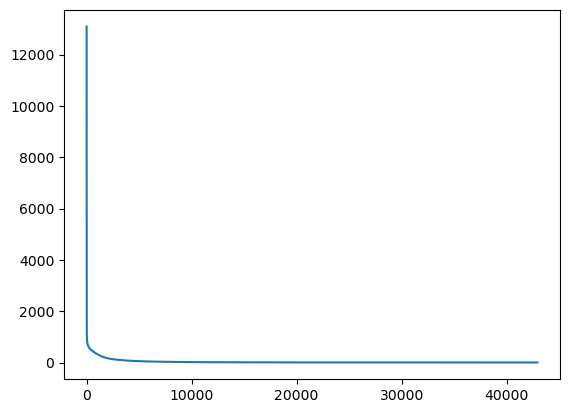

In [14]:
# plot lib upvote distribution
lib_df_upvote.num_upvotes.plot.line()
plt.show()

In [15]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)
con_df_upvote, con_df_upvote_top100 = get_upvoted_URLs(df=con_df, n=100)
print(con_df_upvote.shape)
print(con_df_upvote_top100.shape)
print(con_df_upvote_top100.head)
con_df_upvote.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_UpvotesOnly.csv")
con_df_upvote_top100.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_UpvotesOnlyTop100.csv")

(577388, 7)
(522523, 8)
(100, 8)
<bound method NDFrame.head of      index     ids                                                url  \
0   482932  krynan              https://www.reddit.com/gallery/krxl6t   
1   427866  jpuut2  https://apnews.com/article/Biden-Trump-US-elec...   
2   466397  kifvsl                      https://imgur.com/WY5NwZR.jpg   
3   476578  kw4caq  https://www.foxnews.com/politics/mcconnell-bel...   
4   467128  khk7w5  https://conservativechoicecampaign.com/amazing...   
..     ...     ...                                                ...   
95  407248  izpvl2  https://www.npr.org/2019/11/25/782842651/trump...   
96  447768  k0zib6  https://www.newsmax.com/politics/trump-troops-...   
97  491087  laut43  https://www.washingtontimes.com/news/2021/feb/...   
98  513407  mjz6t6  https://www.washingtonexaminer.com/news/charle...   
99  514256  mispk5  https://www.foxnews.com/politics/matt-gaetz-co...   

    created_utc        author  num_upvotes  num_comments  \


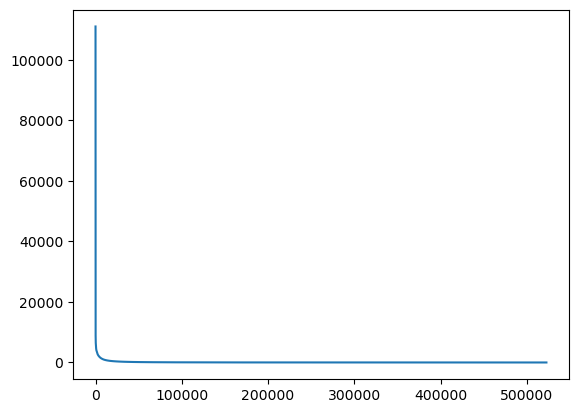

In [16]:
# plot conserv upvote distribution
con_df_upvote.num_upvotes.plot.line()
plt.show()

### URL-domain based URL selection

In [19]:
def extract_domain(df):
    url_list = list(df.url)
    domain_list = []
    for URL in url_list:
        attributes = tldextract.extract(URL)
        domain_list.append(attributes.domain)

    domain_df = pd.DataFrame({ "url_domain" : domain_list })
    df_concat = pd.concat([df, domain_df], axis=1)

    return df_concat

def get_domain_ordered_URLs(df, n):
    # use groupby, count() and sort_values()
    df['Frequency'] = df.groupby('url_domain')['url_domain'].transform('count')
    df = df.sort_values('Frequency', ascending=False)
    df = df.reset_index()
    df_domainFreq_topn = df[:n]
    
    return df, df_domainFreq_topn

In [20]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)

lib_domain_df = extract_domain(lib_df)
print(lib_domain_df.shape)
print(lib_domain_df.head)
lib_domain_df.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainAdded.csv")

lib_df_domainFreq, lib_df_domainFreq_top100 = get_domain_ordered_URLs(df=lib_domain_df, n=100)
print(lib_df_domainFreq.shape)
print(lib_df_domainFreq_top100.shape)
print(lib_df_domainFreq_top100.head)
lib_df_domainFreq.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAdded.csv")
lib_df_domainFreq_top100.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAddedTop100.csv")

(48605, 7)
(48605, 8)
<bound method NDFrame.head of           ids                                                url  \
0       8le4t  http://mytinyspot.blogspot.com/2009/05/as-gop-...   
1       8l08o         http://www.youtube.com/watch?v=MG4FSCY9Luc   
2       8kneq         http://whohijackedourcountry.blogspot.com/   
3       8k0sf  http://www.rockridgeinstitute.org/research/roc...   
4       8jdfj         http://www.youtube.com/watch?v=nYpnB0ay_64   
...       ...                                                ...   
48600  otmwtj  https://www.reddit.com/r/Liberal/comments/otmw...   
48601  otmlff  https://www.reddit.com/r/Liberal/comments/otml...   
48602  otkzp2  https://www.reddit.com/r/Liberal/comments/otkz...   
48603  otk0tu  https://www.reddit.com/r/Liberal/comments/otk0...   
48604  otio9h  https://www.reddit.com/r/Liberal/comments/otio...   

        created_utc           author  num_upvotes  num_comments      flair  \
0      1.242680e+09       Screedname            0    

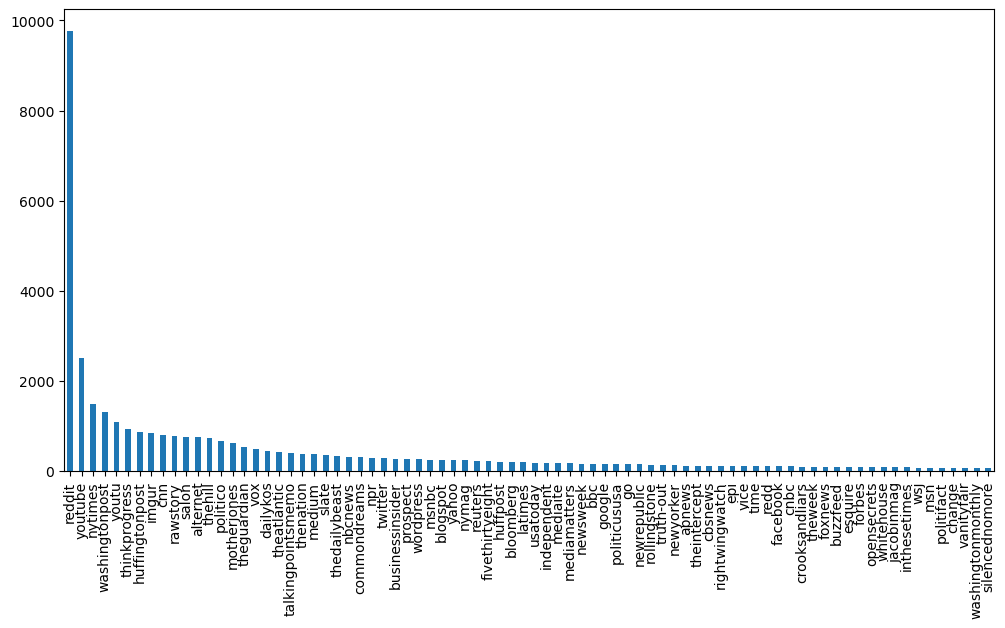

In [29]:
# plot lib url_domain distribution
# lib_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(12, 6))
lib_df_domainFreq.url_domain.value_counts()[:80].plot(kind='bar')
plt.show()

In [30]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)

con_domain_df = extract_domain(con_df)
print(con_domain_df.shape)
print(con_domain_df.head)
con_domain_df.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainAdded.csv")

con_df_domainFreq, con_df_domainFreq_top100 = get_domain_ordered_URLs(df=con_domain_df, n=100)
print(con_df_domainFreq.shape)
print(con_df_domainFreq_top100.shape)
print(con_df_domainFreq_top100.head)
con_df_domainFreq.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAdded.csv")
con_df_domainFreq_top100.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAddedTop100.csv")

(577388, 7)
(577388, 8)
<bound method NDFrame.head of            ids                                                url  \
0        68lfw  http://www.freerepublic.com/focus/f-news/19689...   
1        67npy  http://www.cbsnews.com/stories/2008/01/21/opin...   
2        67n8x               http://www.tsowell.com/speducat.html   
3        67n1u  http://whoisioz.blogspot.com/2008/01/searing-v...   
4        67n0j  http://www.becker-posner-blog.com/archives/200...   
...        ...                                                ...   
577383  oy14da  https://newsbreakforum.com/story/mexico-sues-r...   
577384  oy138v                       https://youtu.be/DVroxCPrm_Q   
577385  oy10ec                https://i.redd.it/uw1sk15fdef71.jpg   
577386  oy0zs8  https://www.reddit.com/r/Conservative/comments...   
577387  oy0zok        https://www.youtube.com/watch?v=LamRwl5Z2qk   

        created_utc         author  num_upvotes  num_comments flair  \
0        1202901623    unkorrupted            

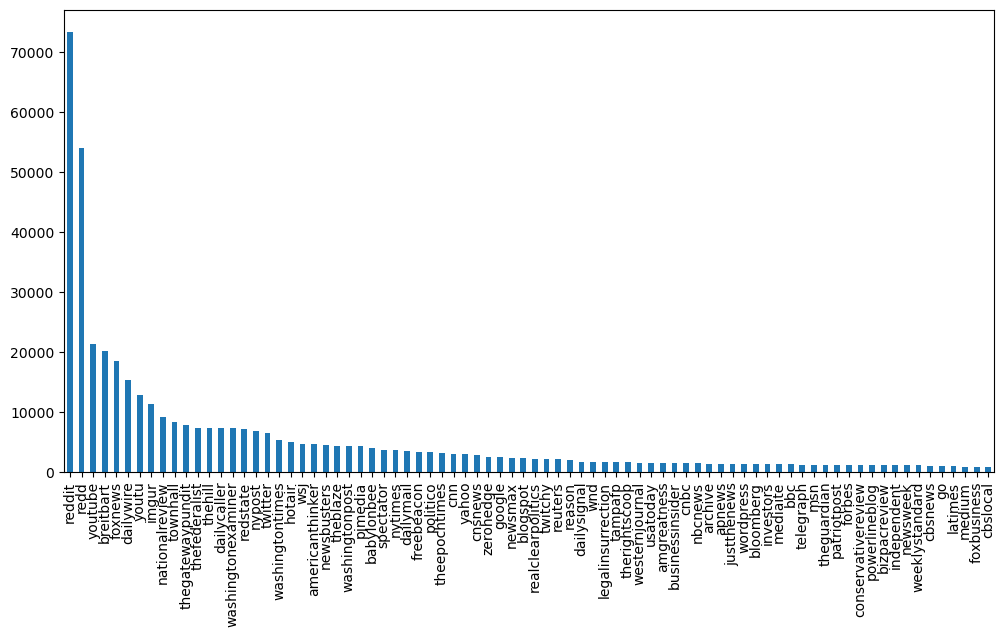

In [31]:
# plot conserv url_domain distribution
# con_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(12, 6))
con_df_domainFreq.url_domain.value_counts()[:80].plot(kind='bar')
plt.show()